In [1]:
import numpy as ng
from sklearn.ensemble import IsolationForest


In [2]:
import pandas as pz

In [3]:
data=pd.read_csv(r"C:\Users\PMLS\Downloads\heart.csv")

In [4]:
data

,age,sex,Chest Pain,Resting Blood Sugar,Serum Cholestrol,Fasting Blood Sugar,restecg,Max Heart Rate Achieved,exang,oldpeak,slope,ca,thalesemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,0.85
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0.40
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0.15
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,0.82


.

In [5]:
data.shape

(1025, 14)

We predict anomaly based on three variables

In [6]:
data.columns

Index(['age', 'sex', 'Chest Pain', 'Resting Blood Sugar', 'Serum Cholestrol',
       'Fasting Blood Sugar', 'restecg', 'Max Heart Rate Achieved', 'exang',
       'oldpeak', 'slope', 'ca', 'thalesemia', 'target'],
      dtype='object')

In [22]:
data['Resting Blood Sugar']= data['Resting Blood Sugar'].astype(int)

## Selecting Features for Anomaly

We choose three features for anomaly detection

In [23]:

Anomaly_features=['Resting Blood Sugar', 'Serum Cholestrol', 'Max Heart Rate Achieved']

In [24]:
# You can change the options in this function call to test different results
# estimators can be changed. A default value is 100
# You can also try different contamination rate choices

model= IsolationForest(n_estimators= 30, contamination= 0.1, random_state= 45)

In [25]:
model.fit(data[Anomaly_features])

IsolationForest(contamination=0.1, n_estimators=30, random_state=45)

In [27]:
data['Anomaly']= model.predict(data[Anomaly_features])

In [29]:
Anomalies=data[data['Anomaly']==-1].count() # Anomalies are given -1 value by the function we used
print("Total Anomalies: ", Anomalies[0])

Total Anomalies:  102


In [30]:
data['Anomaly Scores']

0       0.134277
1       0.128390
2       0.033510
3       0.104645
4       0.025764
          ...   
1020    0.131934
1021    0.114801
1022    0.056879
1023    0.116509
1024    0.056230
Name: Anomaly Scores, Length: 1025, dtype: float64

#### Its alway's good to visualize the results

In [31]:
import seaborn as sns


C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


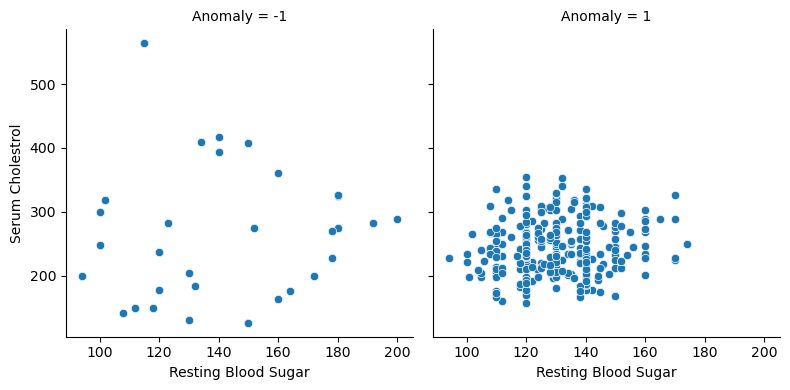

In [32]:
# Using Facet Grid for side by side plots
grid = sns.FacetGrid(data, col= 'Anomaly', height=4, aspect=1)

# Map a plot type to the grid
grid.map(sns.scatterplot, "Resting Blood Sugar", "Serum Cholestrol")

